In [22]:
import os
import re
import scipy
from scipy import stats
import pickle
import subprocess
import shlex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [24]:
X_train_df = pd.read_csv('median_icumean_train.csv')
X_test_df = pd.read_csv('median_icumean_test.csv')
X_holdout_df = pd.read_csv('median_icumean_holdout.csv')

print(X_train_df.shape)
print(X_test_df.shape)
print(X_holdout_df.shape)

(14283, 67)
(4080, 67)
(2041, 67)


In [25]:
X_train_df.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,icu_outcome,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
0,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,0,84.227760,44.0,155.0,12,0,0,0,0,0,1,0,1,0,0,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,13.666667,24.000000,48.333333,11.000000,107.666667,0.866667,144.666667,141.000000,4.366667,30.000000,9.800000,30.100000,32.70,91.000000,182.000000,3.300000,15.600000,9.900000,1.333333,14.333333,32.766667
1,20001361,2043-05-04 14:55:00,2043-05-18 16:58:00,2043-05-04 16:52:00,2043-05-10 17:59:00,6.05,0,1,30.338465,102.0,183.0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,15.400000,22.200000,32.600000,7.260000,107.400000,2.580000,128.000000,140.400000,4.660000,33.120000,11.140000,30.320000,33.56,90.000000,209.600000,3.684000,14.220000,15.260000,1.600000,17.380000,31.240000
2,20002506,2032-03-19 05:42:00,2032-03-28 16:09:00,2032-03-19 05:50:00,2032-03-25 19:23:00,6.56,0,1,24.214207,60.0,170.0,3,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,15.000000,22.333333,16.333333,8.833333,103.666667,0.900000,106.666667,142.333333,4.100000,35.933333,12.066667,30.100000,33.50,89.333333,193.333333,4.020000,13.133333,9.633333,1.266667,13.600000,31.033333
3,20003425,2055-07-21 10:00:00,2055-07-29 14:40:00,2055-07-22 17:13:00,2055-07-26 17:11:00,4.00,0,1,76.551461,72.7,170.0,12,0,1,0,0,0,1,0,1,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,12.000000,21.000000,23.000000,8.550000,100.000000,0.850000,148.000000,133.000000,5.000000,24.450000,7.600000,27.900000,31.05,90.000000,214.000000,2.720000,15.650000,10.100000,1.400000,15.000000,33.500000
4,20003491,1997-12-18 04:50:00,1997-12-28 17:29:00,1997-12-18 06:10:00,1997-12-20 19:02:00,2.54,0,1,56.963058,60.0,170.0,6,0,0,1,1,0,0,1,1,1,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,16.000000,19.333333,44.333333,7.833333,98.333333,1.900000,140.000000,133.666667,5.500000,32.033333,10.466667,29.966667,32.70,91.000000,169.666667,3.523333,15.700000,8.600000,1.533333,16.500000,36.500000


In [26]:
X_train_df.describe()

,id,los_icu,icu_death,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,icu_outcome,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1.428300e+04,14283.000000,14283.00000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000
mean,2.499301e+07,4.862968,0.10691,0.562977,67.230634,85.348792,169.749871,5.810334,0.267591,0.129105,0.344325,0.426171,0.112791,0.283624,0.334033,0.719947,0.471470,0.123083,2.923966,0.130925,0.026325,0.662046,0.037457,0.142547,0.000700,0.042988,0.000140,0.026675,0.000770,0.559686,0.120353,0.069593,0.179794,0.116852,0.120913,0.265210,0.193447,0.006861,0.002941,0.021704,0.150879,0.121193,15.307289,23.009880,32.971921,8.328307,103.155221,1.913360,145.073261,138.138064,4.281938,31.121298,10.161573,29.923418,32.661421,91.450866,199.855313,3.422641,15.751874,11.883691,1.531261,16.551365,36.770599
std,2.871706e+06,6.045947,0.30901,0.496035,15.602344,28.642186,7.923268,2.924375,0.442719,0.335327,0.475164,0.494537,0.316349,0.450772,0.471668,0.449041,0.499203,0.328544,1.744084,0.337330,0.160106,0.473029,0.189886,0.349623,0.026452,0.202838,0.011833,0.161138,0.027742,0.496442,0.325385,0.254469,0.384029,0.321255,0.326038,0.441461,0.395014,0.082551,0.054149,0.145721,0.357943,0.326363,3.959719,4.788587,23.873306,0.709748,6.440612,1.943517,57.717015,5.048396,0.615024,5.056061,1.686899,2.295107,1.373935,6.139115,95.897348,0.588463,2.025444,8.359243,0.634117,6.614060,12.993901
min,2.000130e+07,1.000000,0.00000,0.000000,18.009528,1.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,2.000000,4.050000,71.333333,0.100000,32.000000,104.222222,2.300000,13.500000,3.900000,16.700000,25.500000,53.400000,8.000000,1.360000,11.300000,0.100000,0.800000,8.700000,18.250000
25%,2.251859e+07,1.800000,0.00000,0.000000,57.416664,68.500000,168.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [27]:
# Converting los_icu into 3 categorical bins

low_thres = 2.5
medium_thres = 5

X_train_df['icu_cat'] = 10
X_train_df.loc[X_train_df['los_icu'] < low_thres, 'icu_cat'] = 0
X_train_df.loc[((X_train_df['los_icu'] >= low_thres) & (X_train_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
X_train_df.loc[X_train_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

X_test_df['icu_cat'] = 10
X_test_df.loc[X_test_df['los_icu'] < low_thres, 'icu_cat'] = 0
X_test_df.loc[((X_test_df['los_icu'] >= low_thres) & (X_test_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
X_test_df.loc[X_test_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

X_holdout_df['icu_cat'] = 10
X_holdout_df.loc[X_holdout_df['los_icu'] < low_thres, 'icu_cat'] = 0
X_holdout_df.loc[((X_holdout_df['los_icu'] >= low_thres) & (X_holdout_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
X_holdout_df.loc[X_holdout_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

In [28]:
print(X_train_df.shape)
print(X_test_df.shape)
print(X_holdout_df.shape)

(14283, 68)
(4080, 68)
(2041, 68)


In [29]:
X_train_df.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,icu_outcome,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt,icu_cat
0,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,0,84.227760,44.0,155.0,12,0,0,0,0,0,1,0,1,0,0,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,13.666667,24.000000,48.333333,11.000000,107.666667,0.866667,144.666667,141.000000,4.366667,30.000000,9.800000,30.100000,32.70,91.000000,182.000000,3.300000,15.600000,9.900000,1.333333,14.333333,32.766667,1
1,20001361,2043-05-04 14:55:00,2043-05-18 16:58:00,2043-05-04 16:52:00,2043-05-10 17:59:00,6.05,0,1,30.338465,102.0,183.0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,15.400000,22.200000,32.600000,7.260000,107.400000,2.580000,128.000000,140.400000,4.660000,33.120000,11.140000,30.320000,33.56,90.000000,209.600000,3.684000,14.220000,15.260000,1.600000,17.380000,31.240000,2
2,20002506,2032-03-19 05:42:00,2032-03-28 16:09:00,2032-03-19 05:50:00,2032-03-25 19:23:00,6.56,0,1,24.214207,60.0,170.0,3,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,15.000000,22.333333,16.333333,8.833333,103.666667,0.900000,106.666667,142.333333,4.100000,35.933333,12.066667,30.100000,33.50,89.333333,193.333333,4.020000,13.133333,9.633333,1.266667,13.600000,31.033333,2
3,20003425,2055-07-21 10:00:00,2055-07-29 14:40:00,2055-07-22 17:13:00,2055-07-26 17:11:00,4.00,0,1,76.551461,72.7,170.0,12,0,1,0,0,0,1,0,1,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,12.000000,21.000000,23.000000,8.550000,100.000000,0.850000,148.000000,133.000000,5.000000,24.450000,7.600000,27.900000,31.05,90.000000,214.000000,2.720000,15.650000,10.100000,1.400000,15.000000,33.500000,1
4,20003491,1997-12-18 04:50:00,1997-12-28 17:29:00,1997-12-18 06:10:00,1997-12-20 19:02:00,2.54,0,1,56.963058,60.0,170.0,6,0,0,1,1,0,0,1,1,1,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,16.000000,19.333333,44.333333,7.833333,98.333333,1.900000,140.000000,133.666667,5.500000,32.033333,10.466667,29.966667,32.70,91.000000,169.666667,3.523333,15.700000,8.600000,1.533333,16.500000,36.500000,1


In [30]:
# # splitting into train and test samples

# from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(full_icu_df, test_size=0.2, random_state=42)

# print(X_train.shape)
# print(X_test.shape)

In [31]:
# splitting into X and Y

X_features_to_drop = ['id', 'los_icu', 'icu_death', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime', 'icu_cat', 'icu_outcome']

y_train = X_train_df.icu_cat
X_train = X_train_df.drop(columns=X_features_to_drop)

y_test = X_test_df.icu_cat
X_test = X_test_df.drop(columns=X_features_to_drop)

y_holdout = X_holdout_df.icu_cat
X_holdout = X_holdout_df.drop(columns=X_features_to_drop)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(X_holdout.shape)
print(y_train.shape)
print(y_test.shape)
print(y_holdout.shape)

(14283, 59)
(4080, 59)
(2041, 59)
(14283,)
(4080,)
(2041,)


In [33]:
X_train.dtypes

gender                                                               int64
admission_age                                                      float64
weight_admit                                                       float64
height                                                             float64
charlson_score                                                       int64
atrial_fibrillation                                                  int64
malignant_cancer                                                     int64
chf                                                                  int64
ckd                                                                  int64
cld                                                                  int64
copd                                                                 int64
diabetes                                                             int64
hypertension                                                         int64
ihd                      

In [34]:
# Perform normalization using data from X_train to transform X_test

from sklearn.preprocessing import StandardScaler

num_cols = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# print(num_cols)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_holdout[num_cols] = scaler.transform(X_holdout[num_cols])

In [35]:
X_train.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,14283.000000,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04
mean,1.333231e-16,3.900200e-16,-1.349399e-16,-2.243112e-15,9.452014e-18,1.079520e-16,-5.248355e-17,8.606308e-17,-3.830553e-17,-1.144191e-17,1.790908e-17,-1.004898e-16,5.696082e-17,5.571714e-17,9.452014e-18,9.849994e-17,2.586867e-17,-3.009720e-17,-3.034594e-17,9.364956e-17,6.218430e-18,2.487372e-18,0.000000,1.989898e-17,-9.203277e-18,-1.086982e-16,-4.278280e-17,4.178785e-17,-5.248355e-17,1.174040e-16,-2.487372e-17,-8.233202e-17,2.736109e-17,1.591918e-17,3.979795e-18,-1.492423e-17,-1.691413e-17,3.780806e-17,1.920251e-16,-9.651004e-17,3.979795e-17,-1.262093e-15,-1.405863e-15,-1.144191e-16,-7.213379e-17,-3.443021e-15,8.004364e-16,-3.860402e-16,3.820604e-16,3.733546e-16,1.294926e-15,2.666463e-15,-2.168989e-16,4.716058e-16,-1.412827e-16,-8.457065e-17,-7.959591e-18,-1.223787e-16,3.487296e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.134993e+00,-3.154836e+00,-2.945018e+00,-6.026749e+00,-1.986933e+00,-6.044477e-01,-3.850239e-01,-7.246701e-01,-8.617885e-01,-3.565539e-01,-6.292176e-01,-7.082210e-01,-1.603356e+00,-9.444780e-01,-3.746455e-01,-3.881347e-01,-1.644285e-01,-1.399636e+00,-1.972682e-01,-4.077313e-01,-2.646929e-02,-2.119414e-01,-0.011834,-1.655480e-01,-2.776220e-02,-1.127434e+00,-3.698912e-01,-2.734935e-01,-4.681946e-01,-3.637490e-01,-3.708690e-01,-6.007776e-01,-4.897385e-01,-8.311863e-02,-5.430682e-02,-1.489485e-01,-4.215305e-01,-3.713574e-01,-2.603127e+00,-3.761132e+00,-1.297391e+00,-6

In [36]:
X_test.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,-0.010844,-0.010256,-0.005270,-0.018058,-0.030941,0.006771,-0.010048,0.000079,0.010023,0.001403,-0.011520,-0.001484,-0.018222,-0.009622,-0.019531,-0.005212,0.043775,0.003033,-0.010101,-0.013735,0.001329,-0.018599,0.029594,0.033716,-0.018927,-0.001244,0.029348,-0.012464,-0.018867,0.013919,0.011032,-0.014468,-0.005127,0.005956,0.013591,-0.004294,0.007132,-0.008612,-0.009146,-0.009144,-0.019719,-0.003866,-0.016732,-0.038361,-0.000288,-0.030588,0.003264,0.019590,0.024028,0.013606,0.017951,0.006273,0.019893,0.016688,-0.020015,0.030381,0.035645,0.029947,0.026353
std,1.001440,0.993147,0.931224,1.001911,0.985703,1.003648,0.988894,1.000148,1.001568,1.001838,0.994510,0.999599,1.008845,0.999526,0.977260,0.994389,1.121346,0.999078,0.975152,0.985882,1.024910,0.957112,1.870927,1.094185,0.564353,1.000271,1.033386,0.978731,0.984082,1.016495,1.012811,0.992291,0.996122,1.035078,1.117876,0.985916,1.007030,0.990037,1.014370,0.985589,1.010964,1.003204,0.974718,0.897353,0.991988,1.000478,1.010236,1.020621,1.028732,1.030755,1.012629,1.033956,0.997434,1.020633,1.008651,1.106378,1.093530,1.060812,1.046085
min,-1.134993,-3.110516,-2.945018,-5.395674,-1.986933,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,-0.629218,-0.708221,-1.603356,-0.944478,-0.374646,-0.388135,-0.164429,-1.399636,-0.197268,-0.407731,-0.026469,-0.211941,-0.011834,-0.165548,-0.027762,-1.127434,-0.369891,-0.273494,-0.468195,-0.363749,-0.370869,-0.600778,-0.489738,-0.083119,-0.054307,-0.148948,-0.421531,-0.371357,-3.360783,-3.343458,-1.304372,-4.936162,-4.475180,-0.881608,-1.609748,-6.151621,-3.385250,-2.773263,-2.822778,-5.979635,-4.703022,-5.123209,-1.979846,-3.006764,-2.074617,-1.409709,-1.153236,-1.182793,-1.436924
25%,-1.134993,-0.651561,-0.606602,-0.220860,-0.619072,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,-0.629218,-0.708221,-1.603356,-0.944478,-0.374646,-0.388135,-0.164429,-1.399636,-0.197268,-0.407731,-0.026469,-0.211941,-0.011834,-0.165548,-0.027762,-1.127434,-0.369891,-0.273494,-0.468195,-0.363749,-0.370869,-0.600778,-0.489738,-0.083119,-0.054307,-0.148948,-0.421531,-0.371357,-0.666895,-0.628575,-0.669052,-0.603485,-0.567547,-0.542005,-0.607698,-0.522573,-0.702335,-0.666807,-0.668848,-0.4577

# Deep Neural Network Classification

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
# X_train['gender'] = X_train['gender'].astype(int)
# X_test['gender'] = X_test['gender'].astype(int)
print(X_train.dtypes)

gender                                                             float64
admission_age                                                      float64
weight_admit                                                       float64
height                                                             float64
charlson_score                                                     float64
atrial_fibrillation                                                float64
malignant_cancer                                                   float64
chf                                                                float64
ckd                                                                float64
cld                                                                float64
copd                                                               float64
diabetes                                                           float64
hypertension                                                       float64
ihd                      

In [18]:
X_train_tensor = torch.tensor(X_train.to_numpy(),dtype=torch.float32)
m,n = X_train_tensor.shape
y_train_tensor = torch.tensor(y_train.to_numpy(),dtype=torch.long).reshape(m).squeeze()

X_test_tensor = torch.tensor(X_test.to_numpy(),dtype=torch.float32)
m,n = X_test_tensor.shape
y_test_tensor = torch.tensor(y_test.to_numpy(),dtype=torch.long).reshape(m).squeeze()

X_holdout_tensor = torch.tensor(X_holdout.to_numpy(),dtype=torch.float32)
m,n = X_holdout_tensor.shape
y_holdout_tensor = torch.tensor(y_holdout.to_numpy(),dtype=torch.long).reshape(m).squeeze()

In [19]:
print(X_train_tensor.shape)
# y_train_tensor = y_train.view(-1).long()
print(y_train_tensor.shape)

torch.Size([14283, 59])
torch.Size([14283])


In [20]:
print(y_train_tensor)

tensor([1, 2, 2,  ..., 0, 2, 2])


In [21]:
class NN_Classifier(nn.Module):
    def __init__(self, input_size, output_size, dropout_prob): # set the arguments you'd need, including activation function
        super(NN_Classifier, self).__init__()
        self.input_size = input_size
        self.output_size = output_size

        self.layer1 = nn.Linear(self.input_size, 512)
        self.hidden2 = nn.Linear(512, 512)
        self.hidden3 = nn.Linear(512, 128)
        # self.hidden4 = nn.Linear(128, 64)
        # self.hidden5 = nn.Linear(64, 32)
        #self.hidden6 = nn.Linear(16, 8)
        self.output4 = nn.Linear(128, output_size)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.hidden3(x)
        x = self.relu(x)
        x = self.dropout(x)

        # x = self.hidden4(x)
        # x = self.relu(x)
        # x = self.dropout(x)

        # x = self.hidden5(x)
        # x = self.relu(x)
        # x = self.dropout(x)

        # x = self.hidden6(x)
        # x = self.relu(x)
        # x = self.dropout(x)

        x = self.output4(x)
        x = self.softmax(x)

        return x


def train_model(x_train, y_train, epochs=1000):
    model = NN_Classifier(59, 3, 0.3)
    optimiser = optim.Adam(model.parameters(), lr=0.005)
    loss_fn = nn.CrossEntropyLoss() 

    for i in range(epochs):
        # reset gradients to 0
        optimiser.zero_grad()

        # get predictions
        y_pred = model.forward(x_train)
        
        # compute loss (uncomment the next line and fill right hand side)
        abs_loss = loss_fn(y_pred, y_train) 

        # backpropagate
        abs_loss.backward()
    
        # update the model weights
        optimiser.step()
        
        print (f"{i:5d}", abs_loss.item(), sep='\t')
        
    return model
                
NNClassifier = train_model(X_train_tensor, y_train_tensor)

    0	1.0965180397033691
    1	1.0915536880493164
    2	1.0745549201965332
    3	1.0736608505249023
    4	1.0671372413635254
    5	1.0648125410079956
    6	1.0618860721588135
    7	1.057540774345398
    8	1.0558435916900635
    9	1.0537184476852417
   10	1.0513243675231934
   11	1.0498151779174805
   12	1.04926598072052
   13	1.0467123985290527
   14	1.0447728633880615
   15	1.042995572090149
   16	1.0412195920944214
   17	1.0383663177490234
   18	1.035475492477417
   19	1.0330597162246704
   20	1.0312694311141968
   21	1.0273168087005615
   22	1.0253651142120361
   23	1.0240850448608398
   24	1.0209256410598755
   25	1.0164554119110107
   26	1.0148108005523682
   27	1.0139940977096558
   28	1.0097342729568481
   29	1.0064412355422974
   30	1.0030943155288696
   31	1.0003870725631714
   32	1.000069260597229
   33	0.9974769353866577
   34	0.9950051307678223
   35	0.9928527474403381
   36	0.9903461933135986
   37	0.9893155694007874
   38	0.9863620400428772
   39	0.9842645525932312
   40	

In [72]:
# checking classification report on testing set

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

with torch.no_grad():
    y_test_pred = NNClassifier(X_test_tensor)


y_test_pred_NN = torch.argmax(y_test_pred, dim=1)

with torch.no_grad():
    y_holdout_pred = NNClassifier(X_holdout_tensor)

y_holdout_pred_NN = torch.argmax(y_holdout_pred, dim=1)

print("\n\nNN Test Accuracy:\n", classification_report(y_test_tensor, y_test_pred_NN, digits=4))
print("\n\nNN Holdout Accuracy:\n", classification_report(y_holdout_tensor, y_holdout_pred_NN, digits=4))

# mse_test_NNregressor = mean_squared_error(y_test_tensor, y_test_pred)
# print("NN regressor y_test MSE:", mse_test_NNregressor)

# print(confusion_matrix(y_train, y_train_pred))
# print(confusion_matrix(y_test_tensor, y_test_pred_classes))



NN Test Accuracy:
               precision    recall  f1-score   support

           0     0.5199    0.5834    0.5498      1793
           1     0.2842    0.2639    0.2737      1148
           2     0.4261    0.3749    0.3989      1139

    accuracy                         0.4353      4080
   macro avg     0.4101    0.4074    0.4075      4080
weighted avg     0.4274    0.4353    0.4300      4080



NN Holdout Accuracy:
               precision    recall  f1-score   support

           0     0.5256    0.5923    0.5570       883
           1     0.3083    0.2606    0.2824       614
           2     0.3947    0.3824    0.3884       544

    accuracy                         0.4366      2041
   macro avg     0.4095    0.4117    0.4093      2041
weighted avg     0.4253    0.4366    0.4295      2041



In [73]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred_NN)

conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=['Predicted_0', 'Predicted_1', 'Predicted_2'],
                               index=['Predicted_0', 'Predicted_1', 'Predicted_2'])

conf_matrix_holdout = confusion_matrix(y_holdout, y_holdout_pred_NN)

conf_matrix_holdout_df = pd.DataFrame(conf_matrix_holdout, columns=['Predicted_0', 'Predicted_1', 'Predicted_2'],
                               index=['Predicted_0', 'Predicted_1', 'Predicted_2'])


print("NN Test Confusion Matrix:")
print(conf_matrix_test_df)
print('\n\n')
print("NN Holdout Confusion Matrix:")
print(conf_matrix_holdout_df)

NN Test Confusion Matrix:
             Predicted_0  Predicted_1  Predicted_2
Predicted_0         1046          455          292
Predicted_1          562          303          283
Predicted_2          404          308          427



NN Holdout Confusion Matrix:
             Predicted_0  Predicted_1  Predicted_2
Predicted_0          523          216          144
Predicted_1          279          160          175
Predicted_2          193          143          208


In [74]:
# This is a demonstration: You can use this cell for exploring your trained model

idx = 3611 # try on some index

scores = NNClassifier(X_test_tensor[idx:idx+1])
_, predictions = torch.max(scores, 1)
print("true label:", y_test_tensor[idx].item())
print("pred label:", predictions[0].item())

true label: 1
pred label: 0


# running NN model on holdout data

In [136]:
full_icu_holdout_df = pd.read_csv('merged_icu_mean_hold.csv')

In [137]:
full_icu_holdout_df.shape

(2041, 66)

In [138]:
# Converting los_icu into 3 categorical bins

low_thres = 2.5
medium_thres = 5

full_icu_holdout_df['icu_cat'] = 10
full_icu_holdout_df.loc[full_icu_df['los_icu'] < low_thres, 'icu_cat'] = 0
full_icu_holdout_df.loc[((full_icu_df['los_icu'] >= low_thres) & (full_icu_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
full_icu_holdout_df.loc[full_icu_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

In [139]:
X_features_to_drop = ['id', 'los_icu', 'icu_death', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime', 'icu_cat']

X_holdout = full_icu_holdout_df.drop(columns=X_features_to_drop)
y_holdout = full_icu_holdout_df.icu_cat

In [140]:
print(X_holdout.shape)
print(y_holdout.shape)

(2041, 59)
(2041,)


In [141]:
X_holdout[num_cols] = scaler.transform(X_holdout[num_cols])

In [142]:
X_holdout.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2.041000e+03,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000
mean,-0.004208,-0.009732,0.018278,-0.021038,0.008594,0.018476,0.012901,0.048117,0.006630,-0.023869,-0.008852,0.015899,0.018554,0.038534,-0.004187,0.005817,-0.009135,0.008220,-0.018135,-0.002865,0.000616,0.036194,-1.429204e-02,0.065090,-0.007315,-0.026005,-0.016572,0.009890,-0.005223,0.026374,-0.012414,-0.007546,0.016958,0.010788,-0.037700,-0.020934,0.002338,-0.013490,-0.034320,-0.000583,-0.018833,-0.024120,-0.003805,0.011696,-0.005430,-0.025001,-0.024572,-0.018943,-0.018571,0.015630,0.002624,0.015346,-0.005194,-0.028137,0.006662,0.045616,0.003580,0.002126,0.016528
std,1.000733,1.002550,0.919629,1.013469,0.998928,1.009727,1.014432,1.014827,1.001209,0.970210,0.995877,1.005756,0.990950,1.001951,0.995339,1.006542,0.973150,0.997402,0.953980,0.997315,1.014247,1.077553,3.470297e-18,1.168808,0.848667,1.003031,0.980657,1.016875,0.995809,1.030689,0.985689,0.996123,1.013264,1.062331,0.566315,0.929615,1.002482,0.984249,0.969771,0.980614,0.976140,0.977834,0.995201,1.019220,0.979126,0.966265,0.991449,0.971373,0.971868,0.992918,1.005599,0.969634,0.988490,0.947432,0.953570,1.257524,1.029949,1.052664,1.064971
min,-1.125134,-3.148401,-3.111357,-5.350361,-1.982402,-0.604562,-0.383093,-0.723563,-0.862214,-0.355837,-0.624852,-0.705844,-1.602539,-0.938446,-0.370012,-0.389609,-0.166445,-1.397838,-0.193845,-0.408637,-0.021834,-0.213428,-1.429204e-02,-0.170927,-0.026100,-1.127467,-0.371081,-0.272295,-0.464389,-0.365599,-0.372149,-0.595853,-0.487843,-0.083618,-0.055432,-0.150651,-0.426624,-0.369298,-2.331380,-3.507619,-1.277869,-4.492522,-5.493022,-0.960196,-1.917426,-5.367302,-2.739153,-3.021790,-2.731553,-4.495046,-4.237148,-3.833618,-2.010933,-2.914607,-1.981104,-1.569042,-1.224448,-1.309923,-1.476421
25%,-1.125134,-0.634820,-0.601349,-0.213188,-0.609557,-0.604562,-0.383093,-0.723563,-0.862214,-0.355837,-0.624852,-0.705844,-1.602539,-0.938446,-0.370012,-0.389609,-0.166445,-1.397838,-0.193845,-0.408637,-0.021834,-0.213428,-1.429204e-02,-0.170927,-0.026100,-1.127467,-0.371081,-0.272295,-0.464389,-0.365599,-0.372149,-0.595853,-0.487843,-0.083618,-0.055432,-0.150651,-0.426624,-0.369298,-0.661878,-0.607409,-0.679900,-0.579814,-0.640866,-0.557880,-0.616482,-0.549011,-0.704461,-0.642245,-

In [143]:
X_holdout_tensor = torch.tensor(X_holdout.to_numpy(),dtype=torch.float32)
m,n = X_holdout_tensor.shape
y_holdout_tensor = torch.tensor(y_holdout.to_numpy(),dtype=torch.long).reshape(m).squeeze()

print(X_holdout_tensor.shape)
# y_train_tensor = y_train.view(-1).long()
print(y_holdout_tensor.shape)

torch.Size([2041, 59])
torch.Size([2041])


In [144]:
with torch.no_grad():
    y_holdout_pred = NNClassifier(X_holdout_tensor)

y_holdout_pred_classes = torch.argmax(y_holdout_pred, dim=1)

print(confusion_matrix(y_holdout_tensor, y_holdout_pred_classes))

[[377 248 261]
 [247 174 192]
 [217 162 163]]


In [145]:
print("\n\nTest Accuracy:\n", classification_report(y_holdout_tensor, y_holdout_pred_classes))



Test Accuracy:
               precision    recall  f1-score   support

           0       0.45      0.43      0.44       886
           1       0.30      0.28      0.29       613
           2       0.26      0.30      0.28       542

    accuracy                           0.35      2041
   macro avg       0.34      0.34      0.34      2041
weighted avg       0.35      0.35      0.35      2041



# Vanilla Random Forest Classifier

In [79]:
X_train.shape

(14283, 59)

In [80]:
y_train.shape

(14283,)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_forest = RandomForestClassifier(
    max_depth=8, 
    min_samples_split=10,
    n_estimators=100,
    random_state=26, 
    # class_weight={0: 1, 1: 3}
)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=26)

In [82]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [83]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.52      0.97      0.68      6243
           1       0.99      0.07      0.13      4197
           2       0.75      0.44      0.56      3843

    accuracy                           0.56     14283
   macro avg       0.75      0.49      0.45     14283
weighted avg       0.72      0.56      0.48     14283



Test Accuracy:
               precision    recall  f1-score   support

           0       0.48      0.92      0.63      1793
           1       0.43      0.00      0.01      1148
           2       0.53      0.30      0.38      1139

    accuracy                           0.49      4080
   macro avg       0.48      0.41      0.34      4080
weighted avg       0.48      0.49      0.39      4080



In [85]:
print(confusion_matrix(y_test, y_test_pred))

[[1644    2  147]
 [ 989    3  156]
 [ 794    2  343]]


# Feature selection for Random Forest

In [86]:
# Getting feature importance
feature_importances = random_forest.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
feature_ranking = []
feature_ranking_total = []
print("Feature ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. Feature {X_train.columns[idx]}: {feature_importances[idx]}")
    feature_ranking.append(X_train.columns[idx])
    feature_ranking_total.append(X_train.columns[idx])

Feature ranking:
1. Feature height: 0.17776812576545598
2. Feature wbc: 0.042558366310483736
3. Feature glucose: 0.04071814366886018
4. Feature bicarbonate: 0.0391159931986389
5. Feature pt: 0.036797038265581054
6. Feature ptt: 0.03532215334374649
7. Feature admission_age: 0.03340035771205262
8. Feature bun: 0.0329233356595228
9. Feature sodium: 0.031130469154625813
10. Feature calcium: 0.03112074666657294
11. Feature creatinine: 0.03102328810566729
12. Feature admission_type_URGENT: 0.02975028497711451
13. Feature weight_admit: 0.02817668419998966
14. Feature aniongap: 0.027640611067949083
15. Feature mchc: 0.026691486562654285
16. Feature inr: 0.026045132297688876
17. Feature hematocrit: 0.02535437832870539
18. Feature platelet: 0.02502395838711937
19. Feature rdw: 0.024925359512935133
20. Feature chloride: 0.02463296574876512
21. Feature hemoglobin: 0.024448440836259498
22. Feature potassium: 0.024094793633803426
23. Feature mch: 0.023619503913986536
24. Feature rbc: 0.0230820643677

In [89]:
from sklearn.metrics import f1_score

def forward_feature_selection_f1_test(X, y, X_test, y_test, feature_ranking, model, metric, max_features=None):
    selected_features = []
    best_performance = float('-inf')
    
    if max_features is None:
        max_features = len(feature_ranking)
    
    for feature in feature_ranking:
        selected_features.append(feature)
        X_subset = X[selected_features]
        
        # Train model
        model.fit(X_subset, y)
        
        # Evaluate performance
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict(X_test[selected_features]), pos_label=1, average='macro')
        
        # Check if performance improved
        if performance > best_performance:
            best_performance = performance
            if len(selected_features) == max_features:
                break
        elif performance <= best_performance:
            selected_features.pop()
            break
    
    return selected_features, best_performance

In [90]:
forward_feature_selection_f1_test(X_train, y_train, X_test, y_test, feature_ranking, random_forest, f1_score, max_features=None)

(['height', 'wbc'], 0.37071156172399)

In [91]:
def backward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric):
    
    best_performance = float('-inf')
    selected_features = feature_ranking.copy()
    model.fit(X, y) 
    y_pred = model.predict(X_test)
    best_performance = metric(y_test, model.predict(X_test), pos_label=1, average='macro')
    for i in range(len(feature_ranking)-1):
        last_feature = selected_features.pop()
        model.fit(X[selected_features], y) 
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict(X_test[selected_features]), pos_label=1, average='macro')
        if best_performance - performance < 0.005:
            best_performance = performance
        else:
            selected_features.append(last_feature)
            break

    
    return selected_features, best_performance

In [92]:
backward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, random_forest, f1_score)

(['height',
  'wbc',
  'glucose',
  'bicarbonate',
  'pt',
  'ptt',
  'admission_age',
  'bun',
  'sodium',
  'calcium',
  'creatinine',
  'admission_type_URGENT',
  'weight_admit',
  'aniongap',
  'mchc',
  'inr',
  'hematocrit',
  'platelet',
  'rdw',
  'chloride',
  'hemoglobin',
  'potassium',
  'mch',
  'rbc',
  'mcv',
  'charlson_score',
  'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
  'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
  'gender',
  'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
  'admission_type_EW EMER.',
  'atrial_fibrillation',
  'first_careunit_Surgical Intensive Care Unit (SICU)',
  'ckd',
  'ihd',
  'diabetes',
  'race_encode_Caucasian',
  'malignant_cancer',
  'first_careunit_Medical Intensive Care Unit (MICU)',
  'first_careunit_Trauma SICU (TSICU)',
  'race_encode_African',
  'hypertension',
  'stroke',
  'cld',
  'chf',
  'copd',
  'admission_type_SURGICAL SAME DAY ADMISSION',
  'race_encode_Not Spec

In [93]:
# generating the first 2 parent chromosomes for genetic feature selection algorithm

forward_features = ['height', 'wbc']

backward_features = ['height',
  'wbc',
  'glucose',
  'bicarbonate',
  'pt',
  'ptt',
  'admission_age',
  'bun',
  'sodium',
  'calcium',
  'creatinine',
  'admission_type_URGENT',
  'weight_admit',
  'aniongap',
  'mchc',
  'inr',
  'hematocrit',
  'platelet',
  'rdw',
  'chloride',
  'hemoglobin',
  'potassium',
  'mch',
  'rbc',
  'mcv',
  'charlson_score',
  'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
  'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
  'gender',
  'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
  'admission_type_EW EMER.',
  'atrial_fibrillation',
  'first_careunit_Surgical Intensive Care Unit (SICU)',
  'ckd',
  'ihd',
  'diabetes',
  'race_encode_Caucasian',
  'malignant_cancer',
  'first_careunit_Medical Intensive Care Unit (MICU)',
  'first_careunit_Trauma SICU (TSICU)',
  'race_encode_African',
  'hypertension',
  'stroke',
  'cld',
  'chf',
  'copd',
  'admission_type_SURGICAL SAME DAY ADMISSION',
  'race_encode_Not Specified',
  'admission_type_ELECTIVE',
  'first_careunit_Coronary Care Unit (CCU)',
  'admission_type_OBSERVATION ADMIT',
  'race_encode_Hispanic',
  'admission_type_DIRECT EMER.',
  'first_careunit_Neuro Intermediate',
  'race_encode_Asian',
  'first_careunit_Neuro Stepdown',
  'race_encode_South American',
  'admission_type_EU OBSERVATION',
  'admission_type_DIRECT OBSERVATION']

forward_parent_chromosome = [1 if feature in forward_features else 0 for feature in feature_ranking_total]
backward_parent_chromosome = [1 if feature in backward_features else 0 for feature in feature_ranking_total]
print(forward_parent_chromosome)
print(backward_parent_chromosome)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [94]:
column_list = X_train.columns.tolist()

In [95]:
from geneal.genetic_algorithms import BinaryGenAlgSolver

class MyBinaryGenAlgSolver(BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def fitness_function(self, chromosome):
        selected_features = np.where(chromosome)[0]
        selected_features_list = []
        for i in selected_features:
            selected_features_list.append(column_list[i])
        X_train_subset = X_train[selected_features_list]
    
        random_forest.fit(X_train_subset, y_train)

        X_test_subset = X_test[selected_features_list]

        y_pred =  random_forest.predict(X_test_subset)

        # Calculate AUROC as the fitness score
        f1 = f1_score(y_test, y_pred, pos_label=1, average='macro')

        return f1
        """
        Example fitness function.
        """
        # This is just a placeholder. You should implement your own fitness function logic here.
        # For example, you could compute a score based on the number of ones in the chromosome.
        #return np.sum(chromosome)

    def initialize_population(self):
        """
        Initializes the population of the problem.
        """
        # Randomly initialize the population using numpy's random.randint method.
        forward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        backward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
        bits_array = [forward_parent_chromosome, backward_parent_chromosome]

        for _ in range(self.pop_size-2):
            bits = np.zeros(self.n_genes)
            bits[: np.random.randint(0, self.n_genes)] = 1
            np.random.shuffle(bits)

            bits_array.append(bits)

        return np.array(bits_array)

    def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
        """
        Creates an offspring from 2 parents with a random crossover point based on a probability.

        :param first_parent: The chromosome of the first parent.
        :param sec_parent: The chromosome of the second parent.
        :param crossover_prob: The probability of crossover.
        :return: The resulting offspring chromosome.
        """
        n_genes = len(first_parent)
        crossover_mask = np.random.rand(n_genes) < 0.5

    # Select a random crossover point
        crossover_pt = np.random.randint(1, n_genes)

    # Perform crossover based on the crossover mask
        offspring = np.where(crossover_mask, sec_parent, first_parent)

        return offspring

    def mutate_population(self, population, n_mutations):
        """
        Mutates the population by flipping bits randomly.
        """
        mutation_rows, mutation_cols = super(
            BinaryGenAlgSolver, self
        ).mutate_population(population, n_mutations)

        population[mutation_rows, mutation_cols] = np.abs(population - 1)[
            mutation_rows, mutation_cols
        ]

        return population

Iteration: 5
Best fitness: 0.37693859345040553
Iteration: 10
Best fitness: 0.37693859345040553
Iteration: 15
Best fitness: 0.37693859345040553
Iteration: 20
Best fitness: 0.37693859345040553
Iteration: 25
Best fitness: 0.37693859345040553
Iteration: 30
Best fitness: 0.37693859345040553
Iteration: 35
Best fitness: 0.37693859345040553
Iteration: 40
Best fitness: 0.37693859345040553
Iteration: 45
Best fitness: 0.3795857635521007
Iteration: 50
Best fitness: 0.3795857635521007


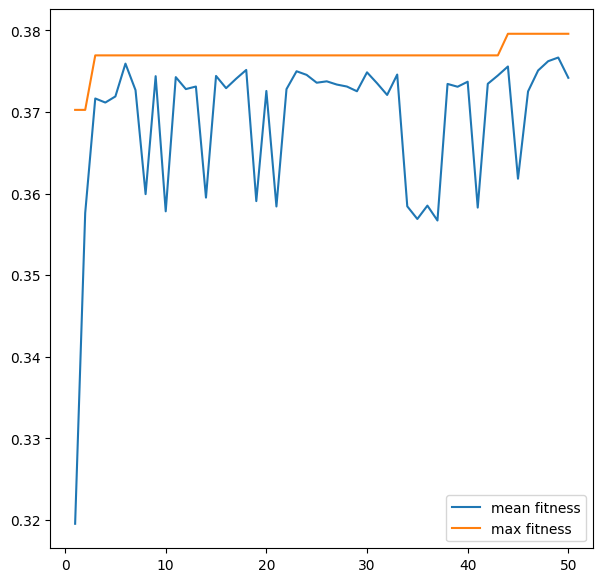


#############################
#			STATS			#
#############################


Total running time: 4 minutes, 57 seconds


Population size: 10
Number variables: 22
Selection rate: 0.3
Mutation rate: 0.025
Number Generations: 50

Best fitness: 0.3795857635521007
Best individual: [1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
None


In [96]:
solver = MyBinaryGenAlgSolver(pop_size=10, n_genes=22, mutation_rate=0.025, max_gen=50, selection_rate=0.3)
best_solution = solver.solve()
print(best_solution)